# Importing modules

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Laoding Datasets

In [28]:
df= pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\twitter sentiment analysis\twitter  sentiment dataset training.csv")
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


# Data Exploring

In [29]:
print(df.shape)


(74681, 4)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [31]:
df.columns = ['Tweet ID','Entity','Sentiment', 'Text']
df.head()

,Tweet ID,Entity,Sentiment,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [32]:
df.drop(['Tweet ID'], axis=1, inplace=True,)

# checking null values

In [33]:
df.isna().any()

Entity       False
Sentiment    False
Text          True
dtype: bool

In [34]:
df.dtypes

Entity       object
Sentiment    object
Text         object
dtype: object

In [35]:
df.isna().sum()

Entity         0
Sentiment      0
Text         686
dtype: int64

In [36]:
df.dropna(inplace=True)

In [37]:
df.isna().sum()

Entity       0
Sentiment    0
Text         0
dtype: int64

# checking duplicates

In [38]:
df.Text.duplicated().any()

True

In [39]:
df[df.Text == "there"]

,Entity,Sentiment,Text
430,Borderlands,Irrelevant,there
17740,PlayStation5(PS5),Neutral,there
28564,ApexLegends,Positive,there
31288,LeagueOfLegends,Negative,there
34858,Fortnite,Positive,there
35788,Microsoft,Negative,there
42832,PlayerUnknownsBattlegrounds(PUBG),Negative,there
45292,Verizon,Positive,there
48316,HomeDepot,Positive,there
53116,RedDeadRedemption(RDR),Positive,there


In [40]:
df.Sentiment.value_counts()

Sentiment
Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

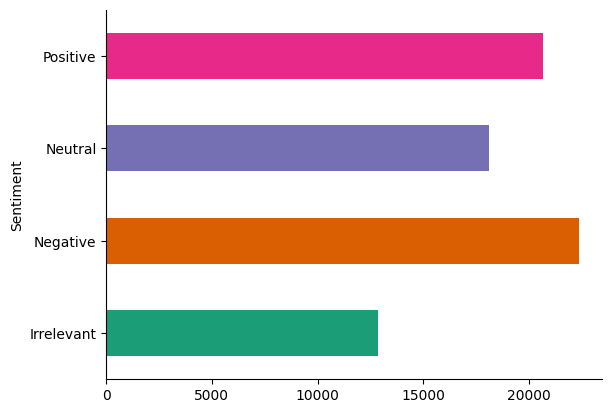

In [41]:
df.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

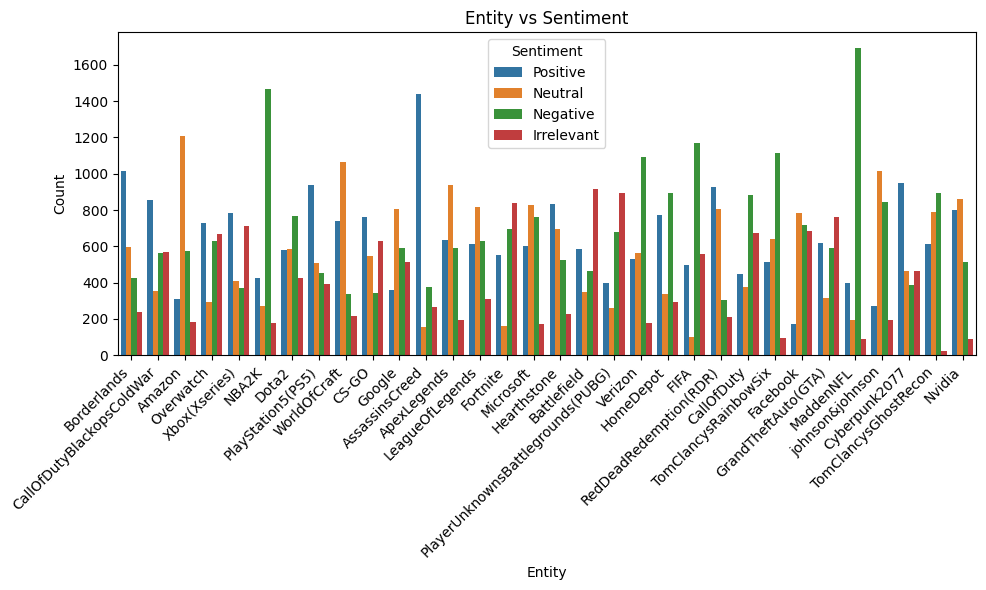

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Entity', hue='Sentiment')
plt.xticks(rotation=45, ha='right')
plt.title('Entity vs Sentiment')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

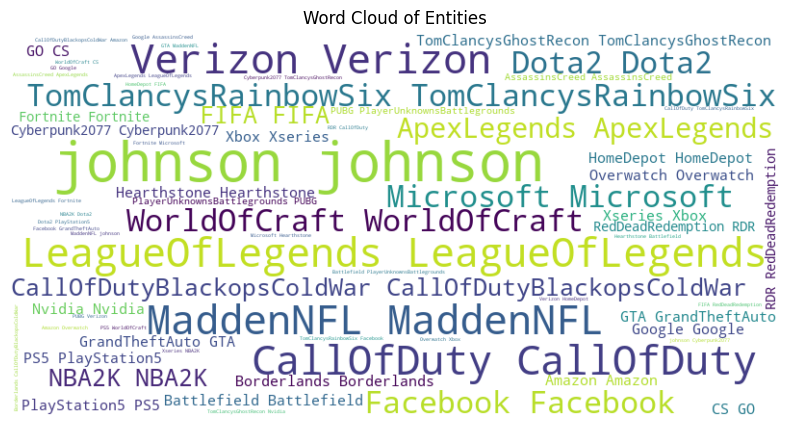

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
entities_text = ' '.join(df['Entity'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(entities_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Entities')
plt.show()

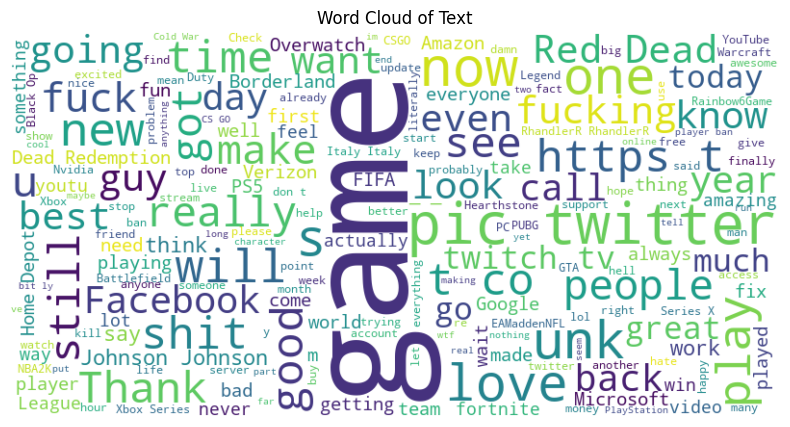

In [44]:
text = ' '.join(df['Text'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text')
plt.show()

In [45]:
labels_counts = pd.DataFrame(df.Sentiment.value_counts())

# preprocessing text

In [46]:
nlp = spacy.load("en_core_web_sm")

In [47]:
def preprocess_data(Text):
    tokens = nlp(Text)
    filtered_token = []
    for token in tokens:
        if token.is_punct or token.is_stop:
            continue
        filtered_token.append(token.lemma_)
    return " ".join(filtered_token)

In [48]:

df['preprocessed_data'] = df.Text.apply(preprocess_data)


In [49]:
encoder = LabelEncoder()
df.Sentiment = encoder.fit_transform(df.Sentiment)

In [50]:
encoder.classes_

array(['Irrelevant', 'Negative', 'Neutral', 'Positive'], dtype=object)

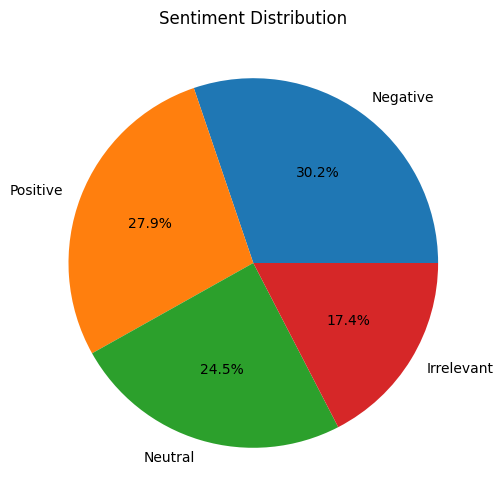

In [51]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_labels = encoder.inverse_transform(sentiment_counts.index)
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_labels, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

In [52]:
X = df['preprocessed_data']
y = df['Sentiment']

In [53]:
x_train, x_test, y_train,y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [54]:
vectorizer = TfidfVectorizer()
X_train_normalized = vectorizer.fit_transform(x_train)
X_test_normalized = vectorizer.transform(x_test)

# Training different models

## Naive Bayes

In [55]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train_normalized, y_train)

MultinomialNB()

In [56]:
y_pred = nb_clf.predict(X_test_normalized)

In [57]:
print(accuracy_score(y_test, y_pred))

0.7311980539225623


In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.46      0.62      2575
           1       0.65      0.90      0.76      4472
           2       0.84      0.63      0.72      3621
           3       0.71      0.81      0.76      4131

    accuracy                           0.73     14799
   macro avg       0.79      0.70      0.71     14799
weighted avg       0.77      0.73      0.72     14799



# Randomforest

In [59]:
rf_clf = RandomForestClassifier(n_estimators=60)
rf_clf.fit(X_train_normalized, y_train)

RandomForestClassifier(n_estimators=60)

In [60]:
y_pred = rf_clf.predict(X_test_normalized)

In [61]:
print(accuracy_score(y_test, y_pred))

0.9109399283735388


In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      2575
           1       0.92      0.93      0.93      4472
           2       0.94      0.89      0.91      3621
           3       0.85      0.94      0.90      4131

    accuracy                           0.91     14799
   macro avg       0.92      0.90      0.91     14799
weighted avg       0.91      0.91      0.91     14799



# Testing now on data

In [64]:
test_data = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Desktop\twitter sentiment analysis\twitter sentiment dataset validation.csv', names=['Tweet ID','Entity','Sentiment', 'Text'])
test_data

,Tweet ID,Entity,Sentiment,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [65]:
y_test = test_data.loc[998].Sentiment
x = test_data.loc[998].Text

In [66]:
preproc_x = preprocess_data(x)

In [67]:

preproc_x

'buy fraction Microsoft today small win'

In [68]:
x_testing = vectorizer.transform([preproc_x])

In [69]:
x_testing.shape

(1, 26746)

In [70]:
y_pred = rf_clf.predict(x_testing)

In [71]:
print(f"the predicted output is {y_pred} and it corresponds to {encoder.classes_[y_pred]} and\n the true value is {y_test}")

the predicted output is [3] and it corresponds to ['Positive'] and
 the true value is Positive


In [72]:
print(y_test)

Positive


In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# Assuming rf_clf is your trained Random Forest classifier
# Instantiate and train the model
rf_clf = RandomForestClassifier(n_estimators=60)
rf_clf.fit(X_train_normalized, y_train)

# Save the trained model to a file using Joblib02
joblib.dump(rf_clf, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [ ]:
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']